# Lecture-06-1 Transfer Matrix Method
* author : Wei-Kai Lee
* Data : 2019/12/13


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

As we discuss in last part in **Lecture 5-2**, we are going to solve the arbitray incident, magnetic material, and multilayer problem in this lecture.

<img src="Lecture-6-Material/Fig-1.jpg" width= "400">
$$Fig. 1.$$

As the picuture above, we are going to calculate the total reflection coefficient, $\gamma_{tot}$, and the transmission coefficeint, $\tau_{tot}$, of a multilayered structure. z-axis is normal to the surface plane. There are $m+1$ layers and the bottom layer is labeled as $0$ and the toppest layer is labeled as $m$. Besides, the thickness of the $i$-th layer is $d_i$ and the relative permittivity and relative permeability of $i$-th layer are $\epsilon_{r,i}$ and $\mu_{r,i}$. The z of the interface between $i$-th layer and $(i+1)$-th layer is $z_i$ and $z_0$. $z = 0$ is at the incident position.

As in **Fig. 1**, if a ray is incident from material $0$, there would be rays propagating toward both +z and -z in material $0$~$(m-1)$. Besides, in material m, only ray propagating toward +z because there is no way incident in material $m$. One possible method to solve $\gamma_{tot}$ and $\tau_{tot}$ is multi-beam interference; however, it need to used iteration method, which might not suitable for vectorization computation. We are going to use [transfer matrix method](https://en.wikipedia.org/wiki/Transfer-matrix_method_(optics)) to deal with this problem. 

## Re-discussion Lecture 4

In **Lecture 4**, we showed what TE mode and TM mode is for a plane wave. However, we did not really show that what is the difference between the TE mode and TM mode. We only showed you that if considered a ray on x-z plane and $k_y = 0$, then the Maxwell's equations can be separated into two different parts.

However, we do not show what the directions of x-, y- and z-axis really are. y-axis is on the plane normal to $\textbf{k}$, $P$ as in **Fig. 2**, but it have not be determined yet. Besides, in **Lecture 4**, from Maxwell's equations, in source-free region, the electric field, $\textbf{E}$, and the magnetic intensity field, $\textbf{H}$, are always normal to $k$ no matter it is TE mode or TM mode. That is to say, both $\textbf{E}$ and $\textbf{H}$ are also on plane $P$. Then a strange thing would be happened. If there is a EM plane wave, it is always possible to change the direction of y-axis to let $\textbf{E}$ of the ray parallel to y-axis or let $\textbf{H}$ parallel to y-axis. Then this plane wave can be TE or TM simultaneouely. As a result, actually, we did not show you what the TE mode and TM mode are in **Lecture 4** yet. We only showed you, for a given $\textbf{k}$, there would be two different orthogonal modes.

<img src="Lecture-6-Material/Fig-2.jpg" width= "300">
$$Fig. 2.$$ 



## More discussion about Lecture 5

However, in **Lecture 5**, the reflection coefficients and the transmission coefficeints of TE mode and TM mode are totally different, which indicating that there must be something to let this two orthgonal modes be separated. As in **Lecture 5-1**, in order to prove the Fresnel equation, besides the definition of TE mode and TM mode, an key point in the proof is **boundary condition**. Because of the different surface continuity properties of the electric field and the magnetic field, the TE mode and the TM mode then become different. 

Then here is question, how to determined the field direction of the modes in an absolute coordinat? Or in other words, what would happed when $k_y$ is not zero.

<img src="Lecture-6-Material/Fig-3.jpg" width="700">
$$Fig. 3. $$

Actually, different from **Lecture 4**, we do a little trick in **Lecture 5**. As in the above figure (**Fig. 3** and we have seen this figure in **Lecture 5**), we supposed the interface is normal to z-axis. Then z-axis has been already determined. As a result, the direciton of the electric field of TE mode can be determined by $\textbf{k}_{\pm}$ and $z$-axis as in **Fig. 3** ( $\textbf{k}_{\pm} = (k_x, k_y, \pm k_z)$)

<font size="4">$$\hat{\textbf{s}} // \hat{\textbf{z}}\times\hat{\textbf{k}}_{\pm} - (1)$$</font>

, where $\hat{\textbf{z}}$ is the normalized direction vector of z-axis and $\hat{\textbf{k}}_{\pm}$ the normalized direction vector of the wave vector. In order to differentiate the absolute coordinate, in the following sections, we are going to use $\hat{\textbf{s}}$ to represent the unit vector the electric field in TE mode or the magnetic field in TM mode. x, y, and z is used to represented the absolute coordinate. If it is necessary to represent the componets of a vector in non-absolute coordinate we are going to use $x|_{\textbf{v}}$, $y|_{\textbf{v}}$, and $z|_{\textbf{v}}$ to represent the three components in $\textbf{v}$-coordinate. Then the direction of the magnetic field in TE mode can be calculated as:

<font size="4">$$\hat{\textbf{p}}_{\pm} = \hat{\textbf{k}}_{\pm}\times\hat{\textbf{s}} - (2)$$</font>

Then because, then $\hat{\textbf{s}}$

<font size="4">$$\left( \begin{array}{c} 0 \\ 0 \\ 1 \end{array} \right) \times \left( \begin{array}{c} k_x \\ k_y \\ \pm k_z \end{array} \right) = \left( \begin{array}{c} -k_y \\ k_x \\ 0 \end{array} \right) // \hat{\textbf{s}} = \left( \begin{array}{c} -k_y/k_t \\ k_x/k_t \\ 0 \end{array} \right) - (3)$$</font>

, where $k_t = \sqrt{k_x^2 + k_y^2}$

<font size="4">$$\hat{\textbf{p}}_{\pm} // \left( \begin{array}{c} k_x \\ k_y \\ \pm k_z \end{array} \right) \times \left( \begin{array}{c} -k_y \\ k_x \\ 0 \end{array} \right) = \left( \begin{array}{c} \mp k_zk_x \\ \mp k_zk_y \\ k_x^2+k_y^2=k_t^2 \end{array} \right) - (4)$$</font>
<font size="4">$$\hat{\textbf{p}}_{\pm} = \left( \begin{array}{c} \mp \frac{k_zk_x}{kk_t} \\ \mp \frac{k_zk_y}{kk_t} \\ \frac{k_t}{k} \end{array} \right) - (5)$$</font>



### Wave Propagation
In **Lecture 5-2**, we have discussed that the total field in one material would equal to sum of the wave propagate toward +z and -z. 

<font size="4">$$F(x,y,z) = F_+exp(i(k_xx+k_yy+k_zz)) + F_-exp(i(k_xx+k_yy-k_zz)) - (6)$$</font>

<font size="4">$$\textbf{E}(x,y,z) = \textbf{E}_+exp(i(k_xx+k_yy+k_zz)) + \textbf{E}_-exp(i(k_xx+k_yy-k_zz)) - (7)$$</font>
<font size="4">$$\textbf{H}(x,y,z) = \textbf{H}_+exp(i(k_xx+k_yy+k_zz)) + \textbf{H}_-exp(i(k_xx+k_yy-k_zz)) - (8)$$</font>

Besides, as we discussed in **Lecture 2**, the tangential components of the wave vector on the interface should be continuous. Hence, $k_{x,1} = k_{x,2} = ... = k_{x,n} = k_x$ and $k_{y,1} = k_{y,2} = ... = k_{y,n} = k_y$. All the tangential component of the wave vectors in all the material are the same. For simpilicity, we can drop out the $exp(i(k_xx+k_yy))$ term in **Eq. (2,3)**. Then

<font size="4">$$\textbf{E}(z) = \textbf{E}_+(z) + \textbf{E}_-(z) = \textbf{E}_+exp(ik_zz) + \textbf{E}_-exp(-ik_zz) - (9)$$</font>
<font size="4">$$\textbf{H}(z) = \textbf{H}_+(z) + \textbf{H}_-(z)= \textbf{H}_+exp(ik_zz) + \textbf{H}_-exp(-ik_zz) - (10)$$</font>

If in the i-th layer, the z component of the wave vector is the same for all z in the i-th layer (i.e. $k_{z,i}$). Then the electric field in $z+\Delta z$ (still in i-th layer) would become

<font size="4">$$\textbf{E}_+(z+\Delta z) = \textbf{E}_+exp(ik_z(z+\Delta z)) = \textbf{E}_+(z)exp(ik_z\Delta z)  - (11)$$</font>
<font size="4">$$\textbf{E}_-(z+\Delta z) = \textbf{E}_-exp(-ik_z(z+\Delta z)) =  \textbf{E}_-(z)exp(-ik_z\Delta z)- (12)$$</font>

With **Eq. (1-4)**, the electric field and the magneitc field of TE mode and TM mode can be represented as 

### TE mode
<font size="4">$$\textbf{E}_{\textbf{s}}(z) = E_{\textbf{s},+}(z)\hat{\textbf{s}} + E_{\textbf{s},-}(z)\hat{\textbf{s}} - (13)$$</font>
<font size="4">$$\textbf{H}_{\textbf{s}}(z) = H_{\textbf{s},+}(z)\hat{\textbf{p}}_+ + H_{\textbf{s},-}(z)\hat{\textbf{p}}_- - (14)$$</font>

, where $E_{\textbf{s},+}$, $E_{\textbf{s},-}$, $H_{\textbf{s},+}$, and $H_{\textbf{s},-}$ are complex constants. 

Besdies, from Maxwell's equation discussed in **Lecture 4**

<font size="4">$$\textbf{H} = \frac{1}{\omega\mu_0\mu_r} \textbf{k}_\pm\times\textbf{E} - (15)$$</font>

Insert **Eq. (13-14)** into **Eq. (15)**

<font size="4">$$H_{\textbf{s},+}(z) = \frac{1}{\omega\mu_0\mu_r} \textbf{k}_+\times E_{\textbf{s},+}(z)\hat{\textbf{s}} = \frac{kE_{\textbf{s},+}(z)}{\omega\mu_0\mu_r} \hat{\textbf{p}}_+ - (16)$$</font>
<font size="4">$$H_{\textbf{s},-}(z) = \frac{1}{\omega\mu_0\mu_r} \textbf{k}_-\times E_{\textbf{s},-}(z)\hat{\textbf{s}} = \frac{kE_{\textbf{s},-}(z)}{\omega\mu_0\mu_r} \hat{\textbf{p}}_- - (17)$$</font>

Hence, **Eq. (14)**

<font size="4">$$\textbf{H}_{\textbf{s}}(z) = \frac{kE_{\textbf{s},+}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_+ + \frac{kE_{\textbf{s},-}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_- - (18)$$</font>

### TM mode
<font size="4">$$\textbf{E}_{\textbf{p}}(z) = E_{\textbf{p},+}(z)\hat{\textbf{p}}_+ + E_{\textbf{p},-}(z)\hat{\textbf{p}}_- - (19)$$</font>
<font size="4">$$\textbf{H}_{\textbf{p}}(z) = H_{\textbf{p},+}(z)\hat{\textbf{s}} + H_{\textbf{p},-}(z)\hat{\textbf{s}} - (20)$$</font>

, where $E_{\textbf{p},+}$, $E_{\textbf{p},-}$, $H_{\textbf{p},+}$, and $H_{\textbf{p},-}$ are complex constants. 

Then, 

<font size="4">$$\textbf{E} = -\frac{1}{\omega\epsilon_0\epsilon_r}\textbf{k}\times\textbf{H} - (21)$$</font>

Insert **Eq. (21)** into **Eq. (19)**.

<font size="4">$$E_{\textbf{p},+}(z) = -\frac{1}{\omega\epsilon_0\epsilon_r} \textbf{k}_+\times H_{\textbf{p},+}(z)\hat{\textbf{s}} = -\frac{kH_{\textbf{p},+}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_+ - (22)$$</font>
<font size="4">$$E_{\textbf{p},-}(z) = -\frac{1}{\omega\epsilon_0\epsilon_r} \textbf{k}_-\times H_{\textbf{p},-}(z)\hat{\textbf{s}} = -\frac{kH_{\textbf{p},-}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_- - (23)$$</font>

Then **Eq. (19)** would become

<font size="4">$$\textbf{E}_{\textbf{p}}(z) = \frac{-kH_{\textbf{p},+}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_+ + \frac{-kH_{\textbf{p},-}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_- - (24)$$</font>


=========================================================================================================================
### Summary

### TE mode
<font size="4">$$\textbf{E}_{\textbf{s}}(z) = E_{\textbf{s},+}(z)\hat{\textbf{s}} + E_{\textbf{s},-}(z)\hat{\textbf{s}}$$</font>
<font size="4">$$\textbf{H}_{\textbf{s}}(z) = \frac{kE_{\textbf{s},+}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_+ + \frac{kE_{\textbf{s},-}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_-$$</font>

### TM mode
<font size="4">$$\textbf{E}_{\textbf{p}}(z) = \frac{-kH_{\textbf{p},+}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_+ + \frac{-kH_{\textbf{p},-}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_-$$</font>
<font size="4">$$\textbf{H}_{\textbf{p}}(z) = H_{\textbf{p},+}(z)\hat{\textbf{s}} + H_{\textbf{p},-}(z)\hat{\textbf{s}}$$</font>

=========================================================================================================================

## Notice

Although the derivations in the previous section is rationable, (or only I think it's rationable >"<)  however, there is a critical point that should be considered in computation. In **Eq. (3)** and **Eq. (5)**, the $k_t$ term in denominator might be zero when $k_x = k_y = 0$. Although it is a single point, however, it would crash the program. As a result, we should carefully take care of this question how this question comes from (to re-check whether the derivation is correct or not). 

When $k_x = k_y = 0$, the wave is propagating along z-axis and as a result, the electric field and the magnetic field (normal to $\textbf{k}$) are parallel to the interfaces. Hence, as we stated in the previous section, it is impossible to separate TE mode and TM mode because of the degeneracy. In order to deal with this question, we should define what $\hat{\textbf{s}}$ and $\hat{\textbf{p}}$ are at $k_x = k_y = 0$.

<font size="4">$$\hat{\textbf{s}} = \left( \begin{array}{c} 1 \\ 0 \\ 0 \end{array} \right) - (18)$$</font>
<font size="4">$$\hat{\textbf{p}}_{\pm} = \left( \begin{array}{c} 0 \\ \pm1 \\ 0 \end{array} \right) - (19)$$</font>

It should be noted that, $\hat{\textbf{s}}$, $\hat{\textbf{p}}_{\pm}$, and $\hat{\textbf{k}}_{\pm}$ should still form an orthogonal coordinate.

<font size="4">$$\hat{\textbf{k}}_{\pm} = \hat{\textbf{s}}\times\hat{\textbf{p}}_{\pm} - (20)$$</font>
<font size="4">$$\hat{\textbf{s}} = \hat{\textbf{p}}_{\pm}\times\hat{\textbf{k}}_{\pm} - (21)$$</font>
<font size="4">$$\hat{\textbf{p}}_{\pm} = \hat{\textbf{k}}_{\pm}\times\hat{\textbf{s}} - (22)$$</font>


In [2]:
def cal_kt(kx, ky):
    # kx : x component of the wave vector
    # ky : y component of the wavevector
    return np.sqrt(kx**2 + ky**2)
def cal_k(kx, ky, kz):
    # kx : x component of the wave vector
    # ky : y component of the wave vector
    # kz : z component of the wave vector
    return np.sqrt(kx**2 + ky**2 + kz**2)
def cal_normalize_direction(kx, ky, kz):
    # kx, ky, kz : wave number components
    k = cal_k(kx, ky, kz)
    return kx/k, ky/k, kz/k
def cal_s(kx, ky, kz):
    # kx : x component of the wave vector
    # ky : y component of the wave vector
    # kz : z component of the wave vector
    kt = cal_kt(kx, ky)
    mask = (kt!=0)
    # prepare containers
    sx = np.zeros(kx.shape, dtype=np.complex)
    sy = np.zeros(kx.shape, dtype=np.complex)
    sz = np.zeros(kx.shape, dtype=np.complex)
    # common case
    sx[mask], sy[mask] = -ky[mask]/kt[mask], kx[mask]/kt[mask]
    # kx = ky = 0 (special case)
    sx[~mask] = 1 
    return sx, sy, sz
def cal_p(kx, ky, kz):
    # kx : x component of the wave vector
    # ky : y component of the wave vector
    # kz : z component of the wave vector
    kt = cal_kt(kx, ky)
    k = cal_k(kx, ky, kz)
    kkt = k * kt
    mask = (kt!=0)
    # prepare containers
    px = np.zeros(kx.shape, dtype=np.complex)
    py = np.zeros(kx.shape, dtype=np.complex)
    pz = np.zeros(kx.shape, dtype=np.complex)
    # common case
    px[mask] = -(kz[mask]*kx[mask])/kkt[mask]
    py[mask] = -(kz[mask]*ky[mask])/kkt[mask]
    pz[mask] = kt[mask]/k[mask]
    # kx = ky = 0 (special case)
    mask2 = np.bitwise_and( (~mask),  (kz>0) )
    py[mask2] = 1
    mask3 = np.bitwise_and( (~mask),  (kz<0) )
    py[mask3] =-1
    return px, py, pz

In [3]:
theta = np.linspace( 0, np.pi/2, 90)
phi = np.ones( theta.shape, dtype=theta.dtype) * 0
wavelength = 520
ko = 2* np.pi/wavelength

kx = ko * np.sin(theta) * np.cos(phi)
ky = ko * np.sin(theta) * np.sin(phi)
kz = ko * np.cos(theta)

sx, sy, sz = cal_s(kx, ky, kz)
px, py, pz = cal_p(kx, ky, kz)

# inner product
sp_dot = sx*px + sy*py + sz*pz
pk_dot = px*kx + py*ky + pz*kz
ks_dot = kx*sx + ky*sy + kz*sz

error_tol = 1e-15 # error tolerance (floating in software)
print( 'check the inner product between s and p equal to zero :', np.sum(np.absolute(sp_dot))<error_tol*theta.size )
print( 'check the inner product between p and k equal to zero :', np.sum(np.absolute(pk_dot))<error_tol*theta.size )
print( 'check the inner product between k and s equal to zero :', np.sum(np.absolute(ks_dot))<error_tol*theta.size )

check the inner product between s and p equal to zero : True
check the inner product between p and k equal to zero : True
check the inner product between k and s equal to zero : True


Text(0.5,0,'$\\theta$ (deg.)')

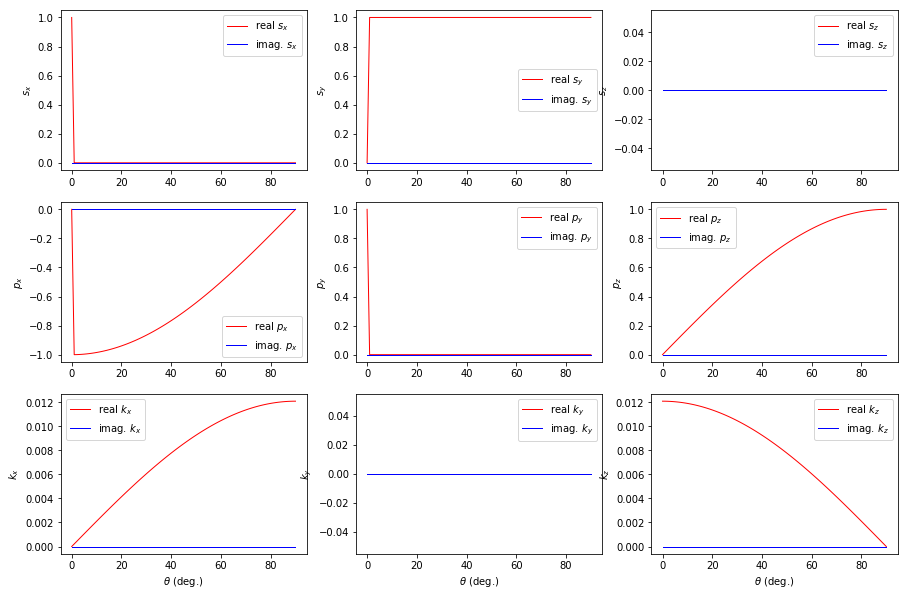

In [5]:
## plot TE data
fig, axes = plt.subplots(3,3)
plt.rcParams['figure.figsize'] = [15, 10]

# s_x
axes[0,0].plot( theta*180/np.pi, np.real( sx ), 'r-', linewidth=1.0)
axes[0,0].plot( theta*180/np.pi, np.imag( sx ), 'b-', linewidth=1.0)
axes[0,0].legend(['real $s_x$', 'imag. $s_x$'], fontsize=10)
axes[0,0].set_ylabel(r'$s_x$', fontsize=10)

# s_y
axes[0,1].plot( theta*180/np.pi, np.real( sy ), 'r-', linewidth=1.0)
axes[0,1].plot( theta*180/np.pi, np.imag( sy ), 'b-', linewidth=1.0)
axes[0,1].legend(['real $s_y$', 'imag. $s_y$'], fontsize=10)
axes[0,1].set_ylabel(r'$s_y$', fontsize=10)

# s_z
axes[0,2].plot( theta*180/np.pi, np.real( sz ), 'r-', linewidth=1.0)
axes[0,2].plot( theta*180/np.pi, np.imag( sz ), 'b-', linewidth=1.0)
axes[0,2].legend(['real $s_z$', 'imag. $s_z$'], fontsize=10)
axes[0,2].set_ylabel(r'$s_z$', fontsize=10)

# p_x
axes[1,0].plot( theta*180/np.pi, np.real( px ), 'r-', linewidth=1.0)
axes[1,0].plot( theta*180/np.pi, np.imag( px ), 'b-', linewidth=1.0)
axes[1,0].legend(['real $p_x$', 'imag. $p_x$'], fontsize=10)
axes[1,0].set_ylabel(r'$p_x$', fontsize=10)

# p_y
axes[1,1].plot( theta*180/np.pi, np.real( py ), 'r-', linewidth=1.0)
axes[1,1].plot( theta*180/np.pi, np.imag( py ), 'b-', linewidth=1.0)
axes[1,1].legend(['real $p_y$', 'imag. $p_y$'], fontsize=10)
axes[1,1].set_ylabel(r'$p_y$', fontsize=10)

# p_z
axes[1,2].plot( theta*180/np.pi, np.real( pz ), 'r-', linewidth=1.0)
axes[1,2].plot( theta*180/np.pi, np.imag( pz ), 'b-', linewidth=1.0)
axes[1,2].legend(['real $p_z$', 'imag. $p_z$'], fontsize=10)
axes[1,2].set_ylabel(r'$p_z$', fontsize=10)

# k_x
axes[2,0].plot( theta*180/np.pi, np.real( kx ), 'r-', linewidth=1.0)
axes[2,0].plot( theta*180/np.pi, np.imag( kx ), 'b-', linewidth=1.0)
axes[2,0].legend(['real $k_x$', 'imag. $k_x$'], fontsize=10)
axes[2,0].set_ylabel(r'$k_x$', fontsize=10)
axes[2,0].set_xlabel(r'$\theta$ (deg.)', fontsize=10)

# k_y
axes[2,1].plot( theta*180/np.pi, np.real( ky ), 'r-', linewidth=1.0)
axes[2,1].plot( theta*180/np.pi, np.imag( ky ), 'b-', linewidth=1.0)
axes[2,1].legend(['real $k_y$', 'imag. $k_y$'], fontsize=10)
axes[2,1].set_ylabel(r'$k_y$', fontsize=10)
axes[2,1].set_xlabel(r'$\theta$ (deg.)', fontsize=10)

# k_z
axes[2,2].plot( theta*180/np.pi, np.real( kz ), 'r-', linewidth=1.0)
axes[2,2].plot( theta*180/np.pi, np.imag( kz ), 'b-', linewidth=1.0)
axes[2,2].legend(['real $k_z$', 'imag. $k_z$'], fontsize=10)
axes[2,2].set_ylabel(r'$k_z$', fontsize=10)
axes[2,2].set_xlabel(r'$\theta$ (deg.)', fontsize=10)

When $\phi = 0$, it is strange that there is a jump point in $s_x$, $s_y$, $p_x$, and $p_y$  at $\theta = 0$. As we described in the previous section, at $\theta = 0$, TE mode and TM mode are degenerate, indicating there is no difference between TE mode and TM mode. As a result, because we forcibly set $\textbf{s}$ and $\textbf{p}$ at $\theta = 0$, the jump point comes out. Fortunately, this jump point would not lead to any problem.

## Wave Vector Coordinate Transformation

Based on **Eq. (3)** and **Eq. (4)**, we can construct a rotation matrix as 

<font size="4">$$\textbf{R} = \left( \begin{array}{cc} k_x/k_t & k_y/k_t & 0 \\ -k_y/k_t & k_x/k_t & 0 \\ 0 & 0 & 1 \end{array} \right) - (23)$$</font>

Then 

<font size="4">$$\hat{\textbf{s}}|_{\textbf{k}} = \textbf{R}\hat{\textbf{s}} = \left( \begin{array}{cc} k_x/k_t & k_y/k_t & 0 \\ -k_y/k_t & k_x/k_t & 0 \\ 0 & 0 & 1 \end{array} \right)\left( \begin{array}{c} -k_y/k_t \\ k_x/k_t \\ 0 \end{array} \right) = \left( \begin{array}{c} 0 \\ 1 \\ 0 \end{array} \right)|_{\textbf{k}}  - (24)$$</font>

<font size="4">$$\hat{\textbf{p}}_\pm|_{\textbf{k}} = \textbf{R}\hat{\textbf{p}} = \left( \begin{array}{cc} k_x/k_t & k_y/k_t & 0 \\ -k_y/k_t & k_x/k_t & 0 \\ 0 & 0 & 1 \end{array} \right)\left( \begin{array}{c} \mp\frac{k_zk_x}{kk_t} \\ \mp\frac{k_zk_y}{kk_t} \\ \frac{k_t}{k} \end{array} \right)= \left( \begin{array}{c} \mp\frac{k_z}{k} \\ 0 \\ \frac{k_t}{k} \end{array} \right)|_{\textbf{k}} - (25)$$</font>

Now, we have successfully change the coordinate into $\textbf{k}$-coordinate. Only y component of $\hat{\textbf{s}}|_{\textbf{k}}$ is non-zero. Hence, we can use the result in **Lecture 5-2**.